In [1]:
import scipy.stats as stats
from scipy.stats import chisquare
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
from scipy.stats import norm
from scipy.stats import bootstrap
from scipy.stats import lognorm
rng = np.random.default_rng()

**1.1 Генерация выборки**

In [2]:
mu, sigma2, n = 10, 1, 100
alpha = 0.05
dist = norm(loc=mu, scale=sigma2)
data = dist.rvs(size=n, random_state=rng)

theta = np.mean(data)
hat_theta = np.exp(np.mean(data))

**1.2 Гистограмма значений бутстрепных оценок и сравнение с настоящим распределением**

In [3]:
def my_statistic(data):
    return np.exp(np.mean(data))

bs_stats = []        
for i in range(10000):        
    bs_sample = np.random.choice(data,size=len(data))        
    bs_stats.append(my_statistic(bs_sample))

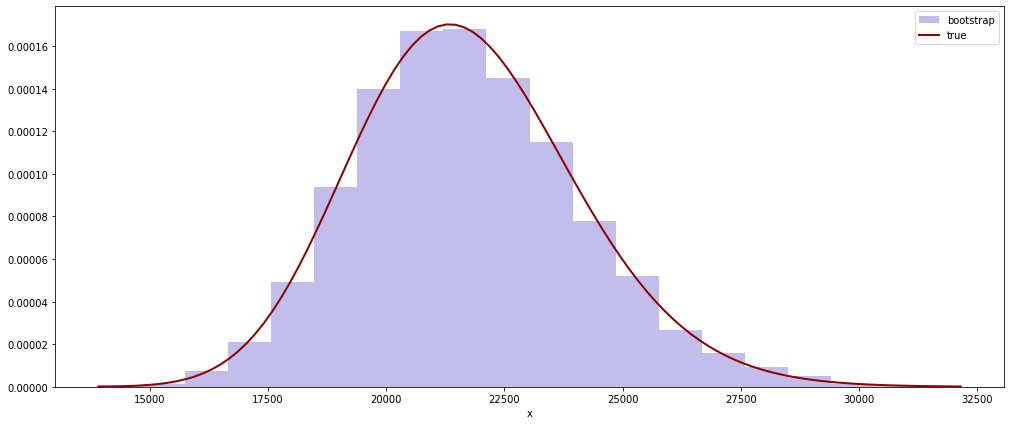

In [4]:
plt.figure(figsize=(17,7))


plt.hist(bs_stats, bins=20, density=True, color='slateblue',label = "bootstrap", alpha = 0.4)

s, loc, scale = stats.lognorm.fit(bs_stats, floc=0)
xmin = np.array(bs_stats).min()
xmax = np.array(bs_stats).max()
x = np.linspace(xmin, xmax, 100)
pdf = stats.lognorm.pdf(x, s, scale=scale)
plt.plot(x, pdf, c='darkred', label='true', linewidth=2)


plt.xlabel("x")
plt.legend()
plt.show()

**1.3 Считаю se и строю доверительный интервал тремя способами**

In [5]:
std_norm = stats.norm(loc=0, scale=1)
z = std_norm.ppf(alpha/2)
se = np.std(bs_stats)
low, high = hat_theta + z * se / np.sqrt(n), hat_theta - z * se / np.sqrt(n)

In [6]:
data = (data,)

In [7]:
res1 = bootstrap(data, my_statistic,  method='basic', confidence_level=0.95, n_resamples=10000,vectorized = False,
                random_state=rng)
res2 = bootstrap(data, my_statistic,  method='percentile', confidence_level=0.95, n_resamples=10000,vectorized = False,
                random_state=rng)

In [8]:
print(f"se = {se}")
print(f"Нормальный доверительный интервал: ({low:.4f}, {high:.4f})") 
print(f"Центральный доверительный интервал: ({res1.confidence_interval[0]:.4f}, {res1.confidence_interval[1]:.4f})")
print(f"Доверительный интервал на основе процентилей: ({res2.confidence_interval[0]:.4f}, {res2.confidence_interval[1]:.4f})")

se = 2382.7430120496565
Нормальный доверительный интервал: (21102.0356, 22036.0537)
Центральный доверительный интервал: (16274.8561, 25769.9397)
Доверительный интервал на основе процентилей: (17420.8964, 26779.7281)


**2.1 Проверка гипотезы о случайности цифр в exp**

In [9]:
observed = [974, 989, 1005, 1008, 982, 992, 1079, 1008, 994, 969]
expected = [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]

In [15]:
statistic, p_value = chisquare(observed, f_exp=expected)
print(f'p_value: {p_value:.6f}')

p_value: 0.477296


In [16]:
alpha = 0.05

if p_value <= alpha:
    print('Отбросить H0')
else:
    print('Не смогли отбросить H0')
    print(f'Сможем отбросить только если alpha >= {p_value:.6f}')

Не смогли отбросить H0
Сможем отбросить только если alpha >= 0.477296


**2.2 Проверка гипотезы об авторстве Марка Твена, использую критерий перестановок**

In [17]:
tom = [.225, .262, .217, .240, .230, .229, .235, .217]
psev =[.209, .205, .196, .210, .202, .207, .224, .223, .220, .201]
n_tom, n_psev = len(tom), len(psev)
data = tom + psev
x = np.abs(np.mean(tom) - np.mean(psev))

In [18]:
array = []
i = 100000
for i in range(i):
    random.shuffle(data)
    array.append(np.abs(np.mean(data[0:n_tom]) - np.mean(data[n_tom:])))

In [19]:
p_val = len(np.where(array>=x)[0])/i
print(f'p-value = {p_val:.6f}')
print(f"p_value < 0.01 - {p_val < 0.01}, отбросываем гипотезу")

p-value = 0.000700
p_value < 0.01 - True, отбросываем гипотезу
